In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import warnings
warnings.filterwarnings('ignore')


# **NYC Trip Data Analysis: Capstone Project**

In [2]:
df = pd.read_csv('data/NYC TLC Trip Record (CLEAN).csv')
df.head()

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion
0,2023-01-01,2023-01-01,00:01:31,00:16:02,Sunday,Standard rate,Morningside Heights,Manhattan,Washington Heights South,Manhattan,14.52,1.0,2.48,16.3,3.76,22.56,Credit card,street hail,N
1,2023-01-01,2023-01-01,00:04:25,00:17:50,Sunday,Standard rate,Williamsburg (North Side),Brooklyn,Long Island City/Queens Plaza,Queens,13.42,1.0,2.80,16.3,2.80,21.60,Credit card,street hail,N
2,2023-01-01,2023-01-01,00:08:05,00:13:26,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem South,Manhattan,5.35,4.0,1.05,5.5,1.36,8.16,Credit card,street hail,N
3,2023-01-01,2023-01-01,00:08:43,00:17:08,Sunday,Standard rate,East Harlem South,Manhattan,Lenox Hill East,Manhattan,8.42,1.0,1.99,11.4,3.33,19.98,Credit card,street hail,Y
4,2023-01-01,2023-01-01,00:09:14,00:26:39,Sunday,Standard rate,Park Slope,Brooklyn,Chinatown,Manhattan,17.42,2.0,3.80,19.1,4.85,29.20,Credit card,street hail,Y


## Data Understanding

## Data Analysis

#### Weekdays vs Weekend 
***
1. Which borough has the most trips
2. Heatmap each zone
3. Morning-Noon-Evenng-Nightime

### **Behavior Analysis**

In [3]:
tripsbyborough = pd.DataFrame(df.groupby(by=['PUborough', 'DOborough'])['PUdate'].count().reset_index())
tripsbyborough = tripsbyborough.rename(columns={'PUdate': 'total trips'})
tripsbyborough

,PUborough,DOborough,total trips
0,Bronx,Bronx,454
1,Bronx,Brooklyn,6
2,Bronx,Manhattan,238
3,Bronx,Queens,21
4,Brooklyn,Bronx,15
5,Brooklyn,Brooklyn,5223
6,Brooklyn,EWR,7
7,Brooklyn,Manhattan,1553
8,Brooklyn,Queens,424
9,Brooklyn,Staten Island,1


In [4]:
PUtoDO = pd.DataFrame(df.groupby(by=['PUborough'])['PUdate'].count().reset_index())
PUtoDO = PUtoDO.rename(columns={'PUborough':'borough','PUdate': 'total PU'})

DOtoPU = pd.DataFrame(df.groupby(by=['DOborough'])['DOdate'].count().reset_index())
DOtoPU = DOtoPU.rename(columns={'DOborough':'borough','DOdate': 'total DO'})

boroughtotal = PUtoDO.merge(DOtoPU, on='borough', how='outer')
boroughtotal.fillna(0,inplace=True)
boroughtotal['Pick-up'] = boroughtotal['total PU'] / (boroughtotal['total PU'] + boroughtotal['total DO'])
boroughtotal['Drop-off'] = boroughtotal['total DO'] / (boroughtotal['total PU'] + boroughtotal['total DO'])

boroughtotal = boroughtotal.set_index('borough')

boroughtotal

,total PU,total DO,Pick-up,Drop-off
borough,,,,
Bronx,719.0,1901,0.274427,0.725573
Brooklyn,7223.0,5899,0.550450,0.449550
Manhattan,31903.0,32120,0.498305,0.501695
Queens,13752.0,13659,0.501696,0.498304
Staten Island,6.0,6,0.500000,0.500000
EWR,0.0,18,0.000000,1.000000


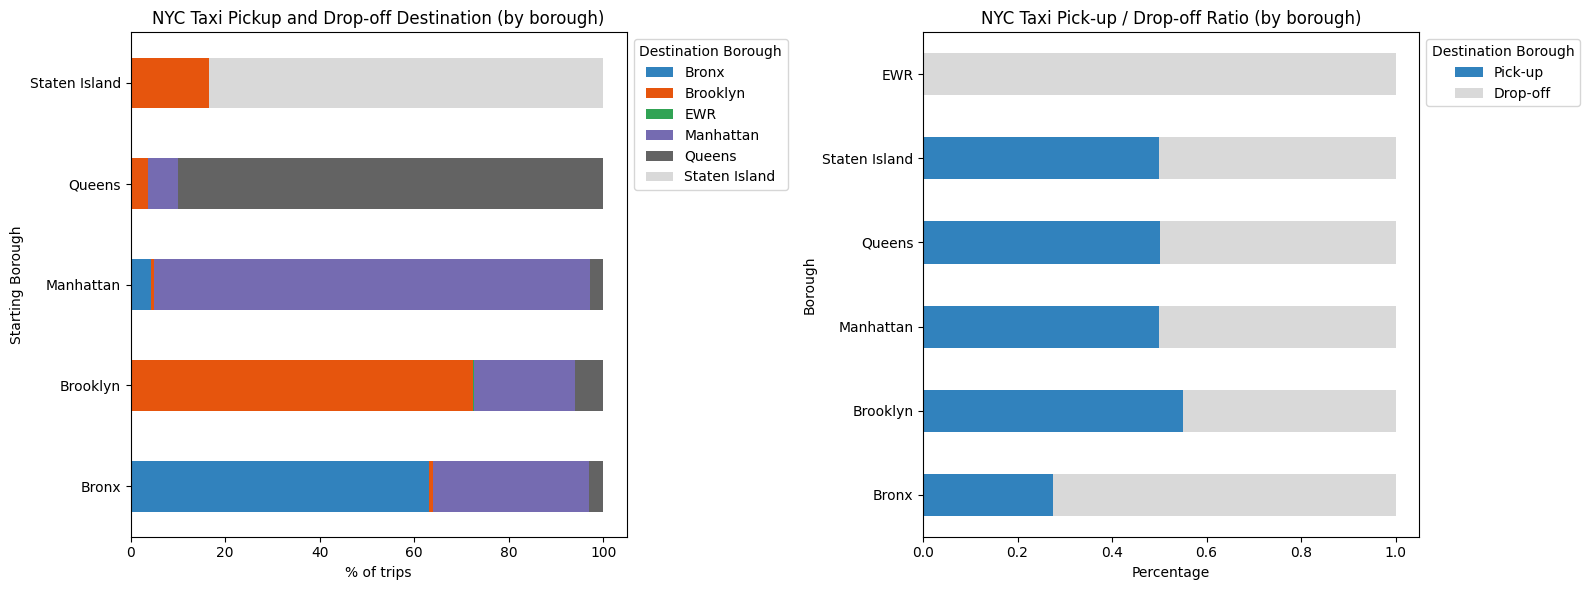

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16 , 6))

# Taxi Destination per Borough
pivoted = tripsbyborough.pivot(index='PUborough', columns='DOborough', values='total trips').fillna(0)
percentage = pivoted.div(pivoted.sum(axis=1), axis=0) * 100

bar1 = percentage.plot(kind='barh', stacked=True, ax=axes[0], cmap='tab20c')
bar1.set_title('NYC Taxi Pickup and Drop-off Destination (by borough)')
bar1.set_ylabel('Starting Borough')
bar1.set_xlabel(r'% of trips')
# bar1.set_yticklabels(['Staten Island','Queens','Manhattan','Brooklyn','Bronx'], rotation=0)
bar1.legend(title='Destination Borough', bbox_to_anchor=(1, 1))

# Pickup / Drop off Ratio
bar2 = boroughtotal[['Pick-up', 'Drop-off']].plot(kind='barh', stacked=True, ax=axes[1], colormap='tab20c')
bar2.set_title('NYC Taxi Pick-up / Drop-off Ratio (by borough)')
bar2.set_xlabel('Percentage')
bar2.set_ylabel('Borough')
bar2.legend(title='Destination Borough', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


**Insights:**

- Most of the taxi trips in NYC are done within the same borough, with a notable prevalence of in-borough travel in Staten Island and Manhattan.
- Manhattan emerges as the preferred destination for inter-borough taxi trips, evident from the significant percentage of trips originating in other boroughs with Manhattan as their destination.
- Besides Brooklyn and Manhattan, the Pickup/Dropoff ratio is close to 50%.
- Bronx only have 28% rate of Pick-up trip, meaning that there are less pickup activity of the taxi trips done in Bronx.

In [6]:
df.head()

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion
0,2023-01-01,2023-01-01,00:01:31,00:16:02,Sunday,Standard rate,Morningside Heights,Manhattan,Washington Heights South,Manhattan,14.52,1.0,2.48,16.3,3.76,22.56,Credit card,street hail,N
1,2023-01-01,2023-01-01,00:04:25,00:17:50,Sunday,Standard rate,Williamsburg (North Side),Brooklyn,Long Island City/Queens Plaza,Queens,13.42,1.0,2.80,16.3,2.80,21.60,Credit card,street hail,N
2,2023-01-01,2023-01-01,00:08:05,00:13:26,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem South,Manhattan,5.35,4.0,1.05,5.5,1.36,8.16,Credit card,street hail,N
3,2023-01-01,2023-01-01,00:08:43,00:17:08,Sunday,Standard rate,East Harlem South,Manhattan,Lenox Hill East,Manhattan,8.42,1.0,1.99,11.4,3.33,19.98,Credit card,street hail,Y
4,2023-01-01,2023-01-01,00:09:14,00:26:39,Sunday,Standard rate,Park Slope,Brooklyn,Chinatown,Manhattan,17.42,2.0,3.80,19.1,4.85,29.20,Credit card,street hail,Y


### Best route for tips
***
1. Which borough has the most trips
2. Heatmap each zone
3. Morning-Noon-Evenng-Nightime

In [7]:
tips = df[['tip_amount','day','PUdate','DOtime','PUtime','PUborough','PUzone','DOborough','DOzone','trip_distance','duration_min','fare_amount','total_amount','payment_type']]
otherfare = tips['total_amount'] - (tips['fare_amount'] + tips['tip_amount'])
tips.insert(12,'other_fare',otherfare)
tips

,tip_amount,day,PUdate,DOtime,PUtime,PUborough,PUzone,DOborough,DOzone,trip_distance,duration_min,fare_amount,other_fare,total_amount,payment_type
0,3.76,Sunday,2023-01-01,00:16:02,00:01:31,Manhattan,Morningside Heights,Manhattan,Washington Heights South,2.48,14.52,16.30,2.50,22.56,Credit card
1,2.80,Sunday,2023-01-01,00:17:50,00:04:25,Brooklyn,Williamsburg (North Side),Queens,Long Island City/Queens Plaza,2.80,13.42,16.30,2.50,21.60,Credit card
2,1.36,Sunday,2023-01-01,00:13:26,00:08:05,Manhattan,Central Harlem,Manhattan,East Harlem South,1.05,5.35,5.50,1.30,8.16,Credit card
3,3.33,Sunday,2023-01-01,00:17:08,00:08:43,Manhattan,East Harlem South,Manhattan,Lenox Hill East,1.99,8.42,11.40,5.25,19.98,Credit card
4,4.85,Sunday,2023-01-01,00:26:39,00:09:14,Brooklyn,Park Slope,Manhattan,Chinatown,3.80,17.42,19.10,5.25,29.20,Credit card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53598,3.51,Tuesday,2023-01-31,00:02:00,23:46:00,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,3.44,16.00,16.53,1.00,21.04,unknown
53599,2.00,Tuesday,2023-01-31,00:07:00,23:51:00,Brooklyn,Williamsburg (South Side),Manhattan,Lenox Hill East,5.82,16.00,23.65,3.75,29.40,unknown
53600,0.00,Tuesday,2023-01-31,00:31:14,23:53:41,Queens,Elmhurst,Queens,Elmhurst/Maspeth,6.44,37.55,38.00,2.50,40.50,Cash
53601,2.22,Tuesday,2023-01-31,00:03:16,23:56:16,Queens,Forest Hills,Queens,Rego Park,1.16,7.00,8.60,2.50,13.32,Credit card


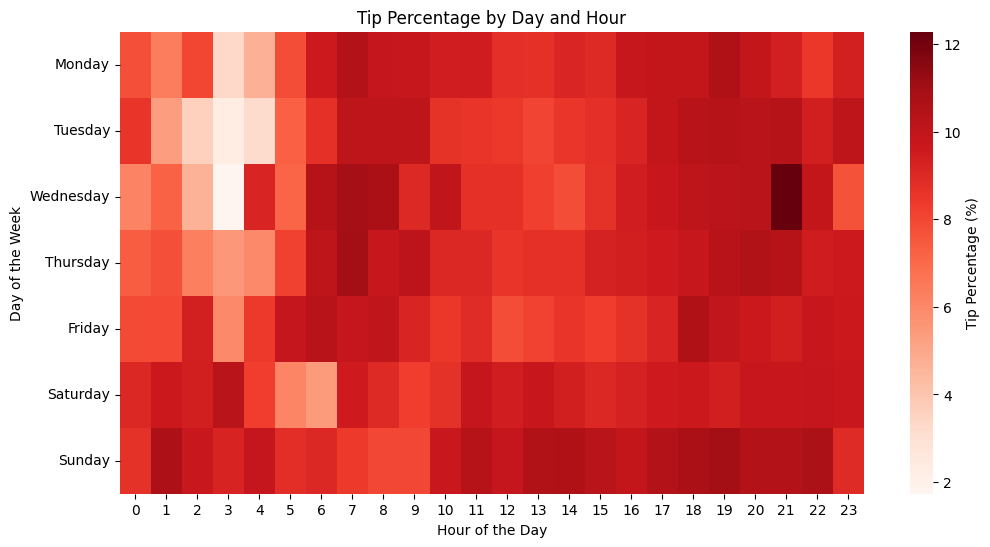

In [8]:
tips['DOtime'] = pd.to_datetime(tips['DOtime'])

tips['tip_percent'] = (tips['tip_amount'] / tips['total_amount']) * 100
tips

custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

heatmap_data = tips.pivot_table(index='day', columns=tips['DOtime'].dt.hour, values='tip_percent', aggfunc='mean').reset_index()
heatmap_data['day'] = pd.Categorical(heatmap_data['day'],categories=custom_order, ordered=True)
heatmap_data = heatmap_data.sort_values('day')
heatmap_data = heatmap_data.set_index('day')
heatmap_data = heatmap_data.sort_index()

heatmap_data


plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Reds', cbar_kws={'label': 'Tip Percentage (%)'})
plt.title('Tip Percentage by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.show()


In [9]:
tipsborough = tips[['tip_amount','PUborough','fare_amount','other_fare']].groupby(by='PUborough').sum()
tipsborough

,tip_amount,fare_amount,other_fare
PUborough,,,
Bronx,680.17,15802.49,1605.84
Brooklyn,23168.30,155871.39,19730.15
Manhattan,81253.41,523045.90,113459.98
Queens,23303.85,253959.71,38789.69
Staten Island,7.26,152.30,33.45


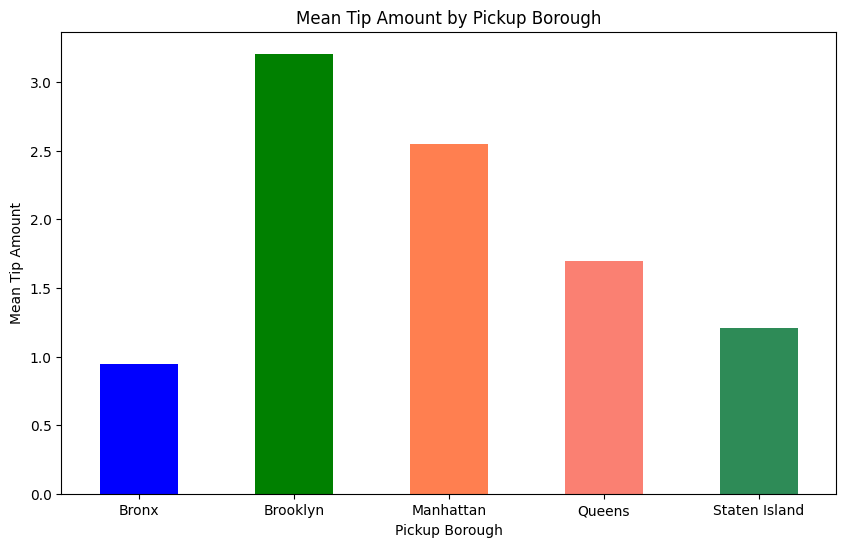

In [10]:
tipsboroughmean = tips.groupby('PUborough')['tip_amount'].mean()
colors = ['blue', 'green', 'coral', 'salmon', 'seagreen']

plt.figure(figsize=(10, 6))
ax = tipsboroughmean.plot(kind='bar', color=colors)

# Customize the plot
plt.title("Mean Tip Amount by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Mean Tip Amount")
plt.xticks(rotation=0)

plt.show()


<Figure size 1000x500 with 0 Axes>

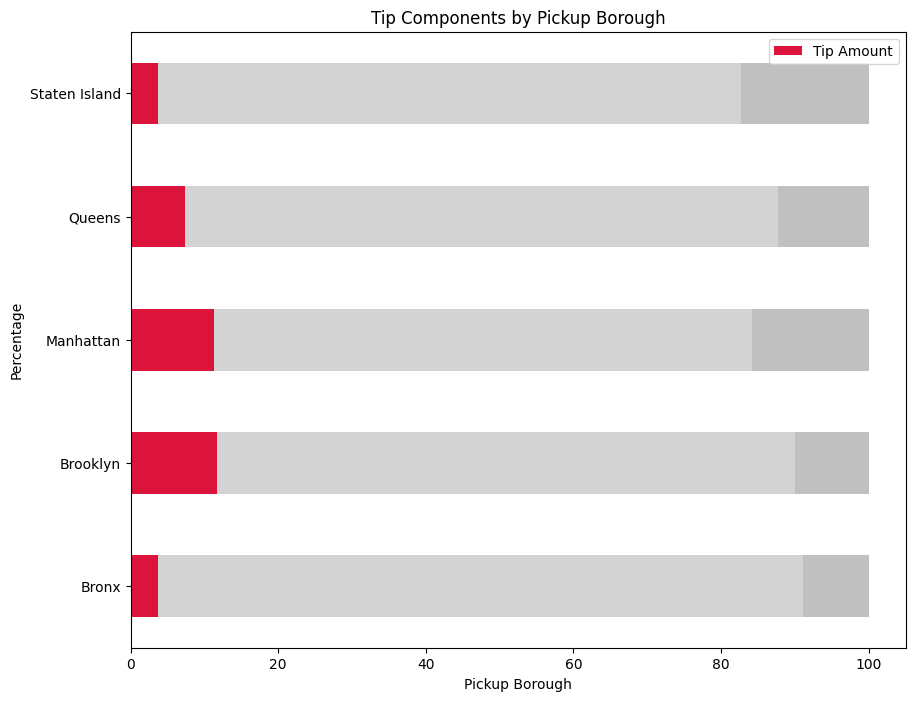

In [16]:
percentage = tipsborough.div(tipsborough.sum(axis=1), axis=0) * 100
plt.figure(figsize=(10,5))

colors = ['crimson','lightgrey', 'silver']
ax = percentage.plot(kind='barh', stacked=True, figsize=(10, 8), color=colors)

plt.title("Tip Components by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Percentage")

ax.legend(["Tip Amount"], loc='upper right', labels=["Tip Amount"])

plt.show()

<Axes: >

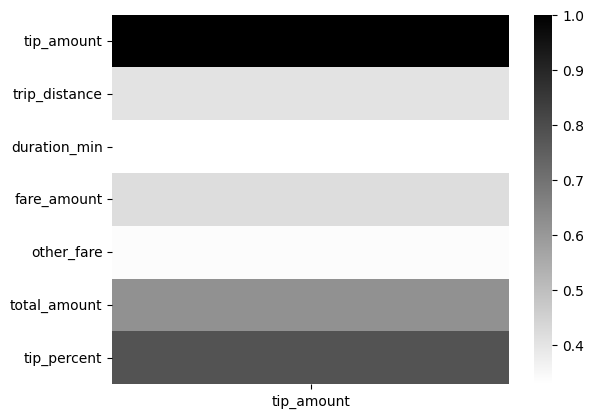

In [12]:
correlate = tips.select_dtypes(include='number').corr()
correlate[['tip_amount']]
sns.heatmap(correlate[['tip_amount']], cmap='binary',fmt=".2f")

#### Best route in termms of distance
***
1. Which borough has the most trips
2. Heatmap each zone
3. Morning-Noon-Evenng-Nightime

In [13]:
####

## Conclusion and Solution

In [14]:
## Data ANa

In [15]:
df.describe()

,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount
count,53603.000000,53603.000000,53603.000000,53603.000000,53603.000000,53603.000000
mean,15.024018,1.461952,3.126186,17.701095,2.395631,23.335707
std,8.494494,0.997059,2.568323,10.360993,2.763557,12.649401
min,0.000000,1.000000,1.000000,2.500000,0.000000,4.500000
25%,9.130000,1.000000,1.520000,10.700000,0.000000,15.000000
50%,12.800000,1.000000,2.260000,14.440000,2.000000,19.700000
75%,18.450000,1.000000,3.700000,21.200000,3.760000,27.660000
max,59.970000,4.000000,38.240000,140.200000,72.000000,181.740000
